# Part A 1


## Imports

In [514]:
#!/usr/bin/env python3
"""My code for Part A"""

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import RcParams
import numpy as np
import matplotlib.pyplot as plt
from ParamID import *
from myStats import *

# from sympy import symbols, Eq

# Load data
filename = 'calibration.csv'
data = np.loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, range_, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data.T


# Assume x = 0.01878 t
# so x * 53.2526 = t


t2x = 53.2526
xvals = np.arange(0, 3.5, 0.01)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Sonar 1

In [637]:
#### sonar 1 stuff
y = sonar1
# Zdata = np.array; 
# xdata = np.array; 
# for yy in y:
#     Zdata.append()


m, c, error, new_range = myIRLS1(range_, y)
yLS = m * range_ + c

h = lambda x: m* x +c
h_sn1 = lambda x: m* x +c

# error = yLS - y
# new_range = range_

err_var_sn1 = np.var(error)
err_mean_sn1 = np.mean(error)
print(f"err varinace = {err_var_sn1}, error mean = {err_mean_sn1}")

xaxis_sn1, mean_x_sn1, var_x_sn1 = VarError(new_range, error)

title = 'Sonar1'

# plt.figure(figsize=(12, 6))
# plt.subplot(121)
# plt.plot(range_, y, '.', alpha=0.2)
# plt.plot(range_, yLS, '-')
# # plt.plot(time, range_)
# plt.title('Sonar1')
# plt.xlabel('Time (s)')
# plt.show()

err varinace = 0.0006703896227575027, error mean = -0.007549511375424903


## IR3

### Don't use this

In [48]:
y = raw_ir3
a, b, c, d , e= myIRLS4(time, y)
# plt.plot(time, y, '.', alpha=0.2)
yLS = a*time*time*time*time + b*time*time*time + c*time*time + d*time + e
# plt.plot(time, yLS2, '-')


In [ ]:
invTime = 1/time
plt.plot(invTime, raw_ir3, '.', alpha=0.2)

This is the slow code cause i was trying to brute force the least squares

In [ ]:
a0, a1, b, c = my1LS1(time, raw_ir3)
yLS = a0/(time+a1)  + b + c*(time)

# plt.figure(figsize=(12, 6))
# plt.subplot(121)
plt.plot(time, raw_ir3, '.', alpha=0.2)
plt.plot(time, yLS, '-')
# plt.plot(time, range_)
plt.title('Infrared 3')
plt.xlabel('Time (s)')


In [51]:
print(f"{a0}, {a1}, {b}, {c}")

1.43, 1.12, [-1.04996293e-05], [0.00168049]


### Use this one

In [636]:
a0, a1, b, c = 0.584905660377, 0.0754716981132, -0.32,	0.265
yLS = a0/(range_+a1)  + b + c*(range_)
# yLS = yLS[40:]
# time2 =  time[40:]

y = raw_ir3
h = lambda x: a0/(x +a1)  + b + c*(x)

h_ir3 = lambda x: a0/(x +a1)  + b + c*(x)

error = yLS - y
err_var_ir3 = np.var(error)
err_mean_ir3 = np.mean(error)


xaxis_ir3, mean_x_ir3, var_x_ir3 = VarError(range_, error, xstep=0.5)


title = 'Infrared 3'

## IR4

### don't use this

In [46]:
y = raw_ir4

a, b, c, d , e= myIRLS4(time, y)
# plt.plot(time, y, '.', alpha=0.2)
yLS = a*time*time*time*time + b*time*time*time + c*time*time + d*time + e
# plt.plot(time, yLS, '-') 
title = "ir4"

In [28]:
y = raw_ir4
a0 = 1.5
b0 = 35
c0 = -166
a1 = 1.14
b1 = -31
c1 = 500

yLS = (a0*time**2 + b0*time + c0 ) / (a1*time**2 + b1*time + c1 )

### Use this one

In [635]:
y = raw_ir4
a0 = 4055.250
b0 = 1863.84
c0 = 380
a1 = 3176.140
b1 = -1650.83
c1 = 700

yLS = (a0*range_**2 + b0*range_ + c0 ) / (a1*range_**2 + b1*range_ + c1 )
h = lambda x: (a0*(x)**2 + b0*x + c0 ) / (a1*(x)**2 + b1*x + c1 )
h_ir4 = lambda x: (a0*(x)**2 + b0*x + c0 ) / (a1*(x)**2 + b1*x + c1 )

# max_hir4 = np.max(h_ir4(range_))
# print(max_hir4)
# print(range_[findIndex(max_hir4, h_ir4(range_))])
error = yLS - y
err_var_ir4 = np.var(error)
err_mean_ir4 = np.mean(error)
xaxis_ir4, mean_x_ir4, var_x_ir4 = VarError(range_, error, xstep=0.5)

print(xaxis_ir4)


title = "infrared 4"

[0.50082344 1.00055211 1.50030281 2.00059381 2.50070933 3.00066458]


## Normal Plot

Text(0.5, 0, 'x, range (m)')

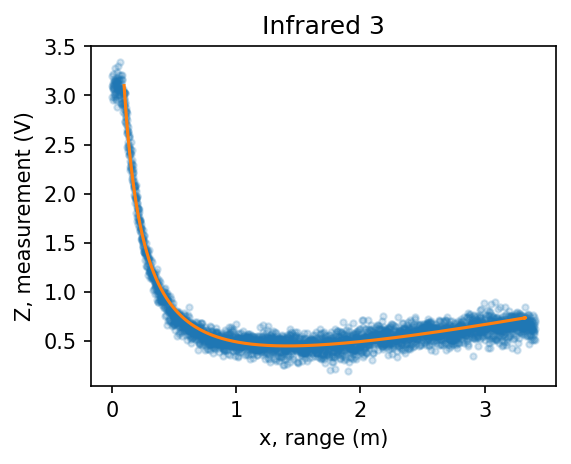

In [599]:
# plt.figure(figsize=(10, 10))
plt.figure(figsize=(4, 3), dpi=150)
plt.plot(time/t2x, y, '.', alpha=0.2)
plt.plot(range_, yLS, '-')
# plt.plot(range_, h_ir3(range_), '-')

# plt.plot(time, range_)
plt.title(title)
plt.ylabel('Z, measurement (V)')
plt.xlabel('x, range (m)')

## Plot error

Text(0.5, 0, 'x, Range (m)')

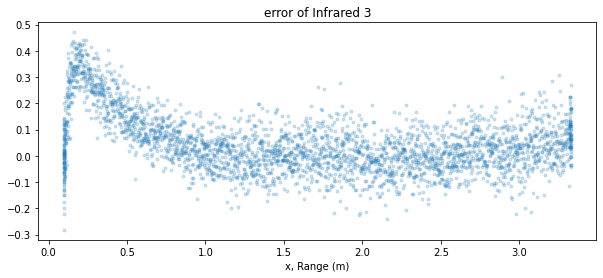

In [583]:
plt.figure(figsize=(10, 4))
error = yLS - y

plt.plot(range_, error, '.', alpha=0.2)
# plt.plot(time, yLS, '-')
# plt.plot(time, range_)
plt.title(f"error of {title}")
plt.xlabel('x, Range (m)')

## Histogram of error

Text(0.5, 1.0, 'Histogram of error of Infrared 3')

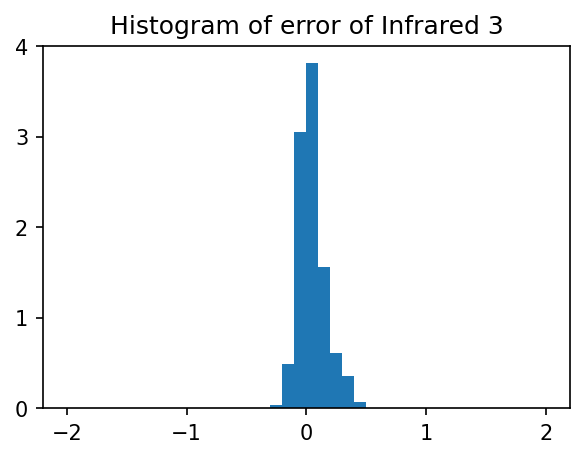

In [581]:
error = yLS-y
plot1 = plt.figure(figsize=(4, 3), dpi=150)
plt.hist(error, bins=40, range=(-2,2), density=True)
plt.tight_layout()
plt.title(f"Histogram of error of {title}")


## Error variance and mean

In [370]:
error_var = np.var(error)
error_mean = np.mean(error)
print(f"variance: {error_var},  mean: {error_mean}")

variance: 0.8329152364915298,  mean: 0.18163199978729486


## Variable Error

Text(0.5, 1.0, 'Variance and Mean of Infrared 3')

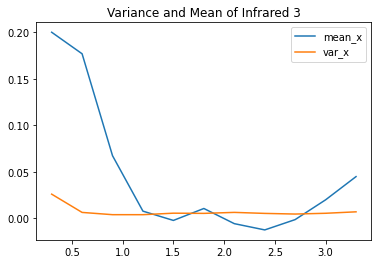

In [580]:
error =  yLS  - y

xaxis, mean_x, var_x = VarError(range_, error, 0.3)

plt.plot(xaxis, mean_x)
plt.plot(xaxis, var_x)
plt.legend(["mean_x", "var_x"])
plt.title(f"Variance and Mean of {title}")

In [ ]:
mean = 0; std = 1; variance = np.square(std)
x = np.arange(-5,5,.01)
f = np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

1.9947091157880856
1.0000001053926104


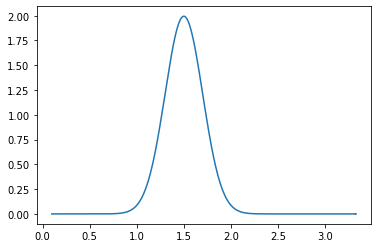

In [474]:
# x = np.arange(0, 500, err_mean_sn1)
x= range_
fish1 = N(x, 1.5, 0.2)
# fish2 = N(range_, 2, 0.2)
# fish = fish1 *fish2 
# plt.plot(range_, fish)
plt.plot(x, fish1)
# plt.plot(range_, fish2)
# plt.legend(["0", "1", "2"])

print(max(fish1))
print(np.trapz(fish1, x, dx = 0.02))

# Part A 2

## Motion model

In [157]:
dt = 0.01

g = lambda x_prev, u, dt: u * dt

W = lambda x_now, x_prev, u_prev, dt: x_now - x_prev - g(x_prev, u_prev, dt)
X_now = lambda x_prev, u_prev, dt: x_prev + g(x_prev, u_prev, dt) #+ Wcur

## Imports

In [659]:
#!/usr/bin/env python3
"""My code for Part A 2"""

# %load_ext autoreload
# %autoreload 2
# %matplotlib inline
# from matplotlib import RcParams
# import numpy as np
# import matplotlib.pyplot as plt
# from ParamID import *
# from myStats import *


# Load data
filename = 'training1.csv'
data1 = np.loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, range_, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data1.T


# Assume x = 0.01878 t
# so x * 53.2526 = t


# xvals = np.arange(0, 3.5, 0.01)



In [660]:

filename = 'training2.csv'
data2 = np.loadtxt(filename, delimiter=',', skiprows=1)

# Split into columns
index, time, range_, velocity_command, raw_ir1, raw_ir2, raw_ir3, raw_ir4, sonar1, sonar2 = data2.T


## next

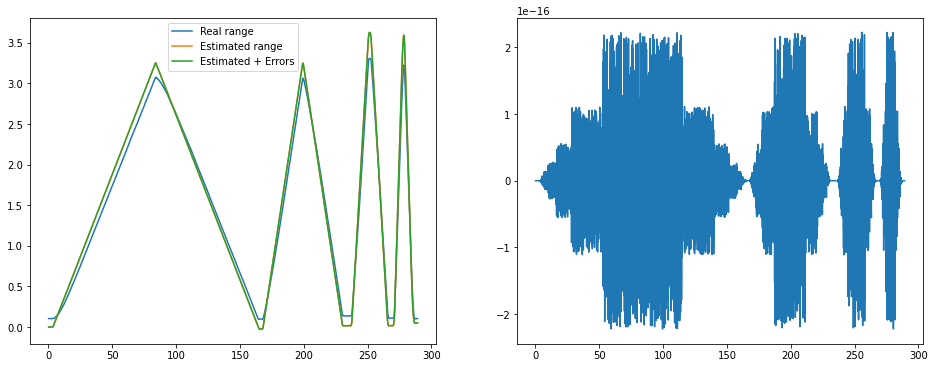

In [190]:
# plt.plot(time, velocity_command)

command = velocity_command_t1
truex = range_t1
t = time_t1

x_estimate = np.array([0])

#process noise
w_all = np.array([0])

for i in range(1, len(t)):
    dt = t[i] - t [i-1]
    x_now = X_now(x_estimate[i-1], command[i-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))
    w_cur = W(x_now, x_estimate[i-1], command[i-1], dt)
    w_all = np.append(w_all, w_cur)
    x_estimate = np.append(x_estimate, x_now)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(t, truex)
plt.plot(t, x_estimate)
plt.plot(t, x_estimate + w_all)

plt.legend(["Real range", "Estimated range", "Estimated + Errors"])

plt.subplot(122)
plt.plot(t, + w_all)


In [191]:
#process noise var
# probably can assume dt = 0.06 seconds

w_var = np.var(w_all)
w_mean = np.mean(w_all)
print("I think can assume dt = 0.06 s")
print(f"w var = {w_var}\nw mean = {w_mean}")


# error = w_all
# plot1 = plt.figure(figsize=(4, 3), dpi=150)
# plt.hist(error, bins=150, range=(-2,2), density=True)
# plt.tight_layout()
# plt.title(f"Histogram of error of W")

I think can assume dt = 0.06 s
w var = 7.29891859727312e-33
w mean = -1.8018702156278342e-18


### Here is the commanded speed and actual speed calculations. maybe not used

In [ ]:
# plt.plot(time, velocity_command)

command = velocity_command
truex = range_
t = time

# x_estimate = np.array([0])
speed_est = np.array([0])

#process noise
w_all = np.array([0])

for i in range(1, len(t)):
    dt = t[i] - t [i-1]

    curspeed = (truex[i] - truex[i-1])/dt
    speed_est = np.append(speed_est, curspeed)
    # x_now = X_now(x_estimate[i-1], command[i-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))
    # w_cur = W(x_now, x_estimate[i-1], command[i-1], dt)
    # w_all = np.append(w_all, w_cur)
    # x_estimate = np.append(x_estimate, x_now)

plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(t, command)
plt.plot(t, speed_est)
# plt.plot(t, x_estimate + w_all)

plt.legend(["Commanded speed", "Estimated speed"])

# plt.subplot(122)
# plt.plot(t, + w_all)


## Next

# Part A 3

### functions

In [647]:

def diff(func, x):
    dx = 0.001
    return (func(x + dx) - func(x))/dx

def invertH(hfunc, z, rnge=(0,4)):
    half = (rnge[1] - rnge[0])/2
    curguess = rnge[1]/2
    lim = 0
    while(np.abs(hfunc(curguess) - z )> 0.0001 and lim < 10000):
        # print(f"curguess {curguess}, z {z}")
        lim+=1
        if (hfunc(curguess) > z):
            # print(f"curguess {curguess}")
            if diff(hfunc,curguess) > 0: # if positive slope
                curguess -= half/2  
            else:
                curguess += half/2 
        else:
            if diff(hfunc,curguess) > 0: # if positive slope
                curguess += half/2  
            else:
                curguess -= half/2 
        half /= 2
    if lim >= 10000:
        pass
        # print("max")
    return curguess, bool(lim >= 10000)


def ambInvertH(hfunc, z, mid, rnge=(0,4)):
    guess, inac = invertH(hfunc, z, rnge=(0,mid))
    guess2, inac2 = invertH(hfunc, z, rnge=(mid,5))
    if (not inac and not inac2):
        return guess, guess2
    elif (not inac):
        return guess, None
    elif (not inac2):
        return None, guess2
    else:
        return None, None

def findIndex(needle, haystack):
    ind = 0
    for hay in haystack:
        if np.abs(hay - needle) < 1:
            return ind
        ind += 1
    print("IT SHOUDLN'T GET HERRE")
    return None


def findIndex2(needle, haystack):
    ind = 0
    for hay in haystack:
        if hay > needle:
            return ind
        ind += 1
    print("IT SHOUDLN'T GET HERRE")
    return ind-1




### Inversion seems to be working fine

0.45
max
1.53515625
0.44997020664331777


Text(0.5, 0, 'x, range (m)')

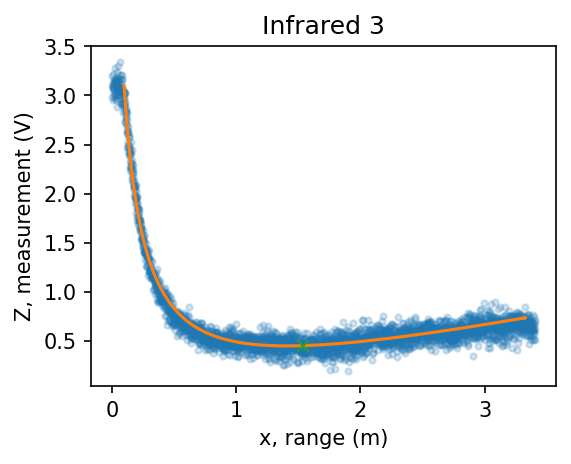

In [626]:

cur_h = h_ir3
# cur_z = raw_ir3[260]
cur_z = 0.45

print(cur_z)
gus1, gus2 = ambInvertH(cur_h, cur_z, mid=1)

# plt.figure(figsize=(10, 10))
plt.figure(figsize=(4, 3), dpi=150)
plt.plot(time/t2x, y, '.', alpha=0.2)
plt.plot(range_, yLS, '-')

try:
    plt.plot(gus1, cur_h(gus1),'x')
    print(gus1)
    print(cur_h(gus1))
except:
    pass
try:
    plt.plot(gus2, cur_h(gus2),'x')
    print(gus2)
    print(cur_h(gus2))
except:
    pass
    #



# plt.plot(range_, h_ir3(range_), '-')

# plt.plot(time, range_)
plt.title(title)
plt.ylabel('Z, measurement (V)')
plt.xlabel('x, range (m)')


In [575]:
t = findIndex(2.5, range_)
# time[t]

x_region = range_#[t-500: t+500]
# for x in xaxis_ir3:

# xaxis_ir3, mean_x_ir3, var_x_ir3 = VarError(range_, error)


# plt.figure(figsize=(15, 3))
# plt.xlim(0, np.max(x_region))

print(f"true range {range_[t]}")



true range 1.500302805671469


### Sonar Likelihood

sonar guess 1.21142578125


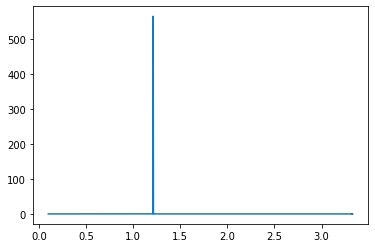

In [598]:
g1, val= invertH(h_sn1, sonar1[t])
L_sn1 = N(x_region, g1,  err_var_sn1)#err_var_sn1
sonarPlot = plt.plot(x_region, L_sn1)


print(f"sonar guess {g1}")
# print(f"area = {np.trapz(L_sn1, x_region, dx = 0.02)}")

### ir3 likelihood

max
ir3 2 guess 1.751953125


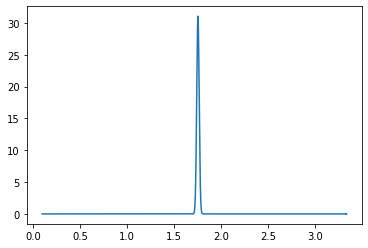

In [602]:
# print(f"\n {raw_ir3[t]}\n")
g1ir3, g2ir3 = ambInvertH(h_ir3, raw_ir3[t], mid=1)
if (not g1ir3 == None):
    # ind = findIndex(g1ir3, xaxis_ir3)
    L_1ir3 = N(x_region ,g1ir3, err_var_ir3) #  var_x_ir3[ind]
    print(f"ir3 1 guess {g1ir3}")
    ir31Plot = plt.plot(x_region, L_1ir3)
else:
    ir31Plot = plt.plot()

if (not g2ir3 == None):
    # ind = findIndex(g2ir3, xaxis_ir3)
    L_2ir3 = N(x_region, g2ir3, err_var_ir3) #var_x_ir3[ind]
    print(f"ir3 2 guess {g2ir3}")
    ir32Plot = plt.plot(x_region, L_2ir3)
else:
    ir32Plot = plt.plot()


### ir4 likelihood

max
ir4 1 guess 0.206558837890625


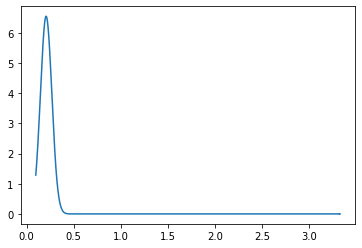

In [595]:
    
g1ir4, g2ir4 = ambInvertH(h_ir4, raw_ir4[t], mid=0.44)
if (not g1ir4 == None):
    # ind = findIndex(g1ir4, xaxis_ir4)
    L_1ir4 = N(x_region ,g1ir4, err_var_ir4)# var_x_ir4[ind]
    print(f"ir4 1 guess {g1ir4}")
    ir41Plot = plt.plot(x_region, L_1ir4)
else:
    ir41Plot = plt.plot()

if (not g2ir4 == None):
    # ind = findIndex(g2ir4, xaxis_ir4)
    L_2ir4 = N(x_region, g2ir4, err_var_ir4)#var_x_ir4[ind]
    print(f"ir4 2 guess {g2ir4}")
    ir42Plot = plt.plot(x_region, L_2ir4)
else:
    ir42Plot = plt.plot()

    

### All likelihoods?

max likely = 565.9789143304225
likelihood is = 1.211212963276238, true is = 1.500302805671469


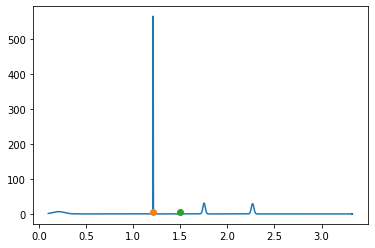

In [597]:


# allL = L_sn1



allL =  L_1ir4 + L_2ir4 + L_sn1 +L_1ir3+ L_2ir3


# while (np.max(allL) > 100):
#     allL /= 10

combinedPlot = plt.plot(x_region, allL)

likelihood = np.max(allL)
print(f"max likely = {likelihood}")


ind = findIndex(likelihood, allL)
likely2b = range_[ind]

guessPlot = plt.plot(likely2b, 5, 'o')
truePlot = plt.plot(range_[t], 5, 'o')

print(f"likelihood is = {likely2b}, true is = {range_[t]}")


# plt.legend(["sonar", "ir3 1", "ir3 2","ir4 1", "ir4 2", "combined", "true range"]) #[sonarPlot,ir31Plot,ir32Plot, combinedPlot,truePlot],



### BLUE

In [642]:
t = 264
print(range_[t])

totalvar = 0
topsum = 0
g_sonar, _= invertH(h_sn1, sonar1[t])
varsn1 = var_x_sn1[findIndex2(g_sonar, xaxis_sn1)]

topsum += g_sonar/varsn1
totalvar += 1/varsn1


g_1ir3, g_2ir3 = ambInvertH(h_ir3, raw_ir3[t], mid=1)
if (not g_1ir3 == None):
    varir31 = var_x_ir3[findIndex2(g_1ir3, xaxis_ir3)]
    topsum += g_1ir3/varir31
    totalvar += 1/varir31

if (not g_2ir3 == None):
    varir32 = var_x_ir3[findIndex2(g_2ir3, xaxis_ir3)]
    topsum += g_2ir3/varir32
    totalvar += 1/varir32

g_1ir4, g_2ir4 = ambInvertH(h_ir4, raw_ir4[t], mid=0.44)
if (not g_1ir4 == None):
    varir41 = var_x_ir4[findIndex2(g_1ir4, xaxis_ir4)]
    topsum += g_1ir4/varir41
    totalvar += 1/varir41
if (not g_2ir4 == None):
    varir42 = var_x_ir4[findIndex2(g_2ir4, xaxis_ir4)]
    topsum += g_2ir4/varir42
    totalvar += 1/varir42


g_blue = topsum / totalvar
print(g_blue)

0.2422040110801685
max
max
0.2525862288204057


## Time based thing

cur t = 0
cur t = 20
cur t = 40
cur t = 60
cur t = 80
cur t = 100
cur t = 120
cur t = 140
cur t = 160
cur t = 180
cur t = 200
cur t = 220
cur t = 240
cur t = 260
cur t = 280
cur t = 300
cur t = 320
cur t = 340
cur t = 360
cur t = 380
cur t = 400
cur t = 420
cur t = 440
cur t = 460
cur t = 480
cur t = 500
cur t = 520
cur t = 540
cur t = 560
cur t = 580
cur t = 600
cur t = 620
cur t = 640
cur t = 660
cur t = 680
cur t = 700
cur t = 720
cur t = 740
cur t = 760
cur t = 780
cur t = 800
cur t = 820
cur t = 840
cur t = 860
cur t = 880
IT SHOUDLN'T GET HERRE
cur t = 900
cur t = 920
cur t = 940
cur t = 960
cur t = 980
cur t = 1000
cur t = 1020
IT SHOUDLN'T GET HERRE
cur t = 1040
cur t = 1060
cur t = 1080
cur t = 1100
cur t = 1120
cur t = 1140
cur t = 1160
cur t = 1180
cur t = 1200
cur t = 1220
cur t = 1240
cur t = 1260
cur t = 1280
cur t = 1300
cur t = 1320
cur t = 1340


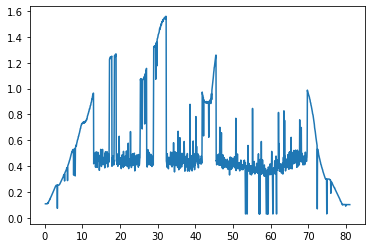

In [662]:

range_est = np.array([])
dt = 0.06
g_blue = 0
for t in range(0, len(time)):
    if (np.mod(t, 20) == 0) :
        print(f"cur t = {t}")


    totalvar = 0
    topsum = 0

    # x_now = X_now(x_estimate[i-1], command[i-1], dt   )#   , W(x_estimate[i-1], command[i-1], dt))
    # x_estimate = np.append(x_estimate, x_now)

    # topsum += x_now/w_var
    # totalvar += 1/w_var
    


    g_sonar, _= invertH(h_sn1, sonar1[t])
    varsn1 = var_x_sn1[findIndex2(g_sonar, xaxis_sn1)]

    if (np.abs(g_blue - g_sonar) < 0.5):
        topsum += g_sonar/varsn1
        totalvar += 1/varsn1


    g_1ir3, g_2ir3 = ambInvertH(h_ir3, raw_ir3[t], mid=1)
    if (not g_1ir3 == None and not g_2ir3 == None):
        if np.abs(g_1ir3 -g_blue) < np.abs(g_2ir3 -g_blue):
            g_2ir3 = None
        else:
            g_1ir3 = None
            
    if (not g_1ir3 == None):
        # varir31 = var_x_ir3[findIndex2(g_1ir3, xaxis_ir3)]
        varir31 = 0.5
        topsum += g_1ir3/varir31
        totalvar += 1/varir31

    if (not g_2ir3 == None):
        # varir32 = var_x_ir3[findIndex2(g_2ir3, xaxis_ir3)]
        varir32 = 0.5
        topsum += g_2ir3/varir32
        totalvar += 1/varir32

    g_1ir4, g_2ir4 = ambInvertH(h_ir4, raw_ir4[t], mid=0.44)

    if (not g_1ir4 == None and not g_2ir4 == None):
        if np.abs(g_1ir4 -g_blue) < np.abs(g_2ir4 -g_blue):
            g_2ir4 = None
        else:
            g_1ir4 = None
            


    if (not g_1ir4 == None):
        # varir41 = var_x_ir4[findIndex2(g_1ir4, xaxis_ir4)]
        varir41 = 0.5
        topsum += g_1ir4/varir41
        totalvar += 1/varir41
    if (not g_2ir4 == None):
        # varir42 = var_x_ir4[findIndex2(g_2ir4, xaxis_ir4)]
        varir42 =0.5
        topsum += g_2ir4/varir42

        totalvar += 1/varir42
             
    g_blue = topsum / totalvar
    
    range_est = np.append(range_est, g_blue)
    # print(g_blue)
    
plt.plot(time, range_est)

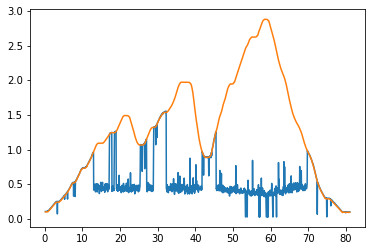

In [663]:
plt.plot(time, range_est)
plt.plot(time, range_)